In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

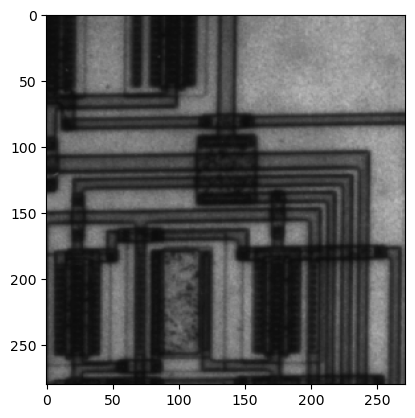

In [ ]:
# Read circuit.png file
circuit = cv2.imread("circuit.png")
plt.imshow(circuit)

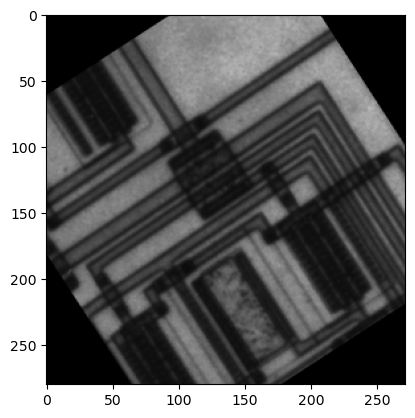

In [ ]:
# Rotate the image 33 degrees
height, width = circuit.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 33, 1)
rotated_circuit = cv2.warpAffine(circuit, rotation_matrix, (width, height))
plt.imshow(rotated_circuit)

Text(0.5, 1.0, 'Edges from original')

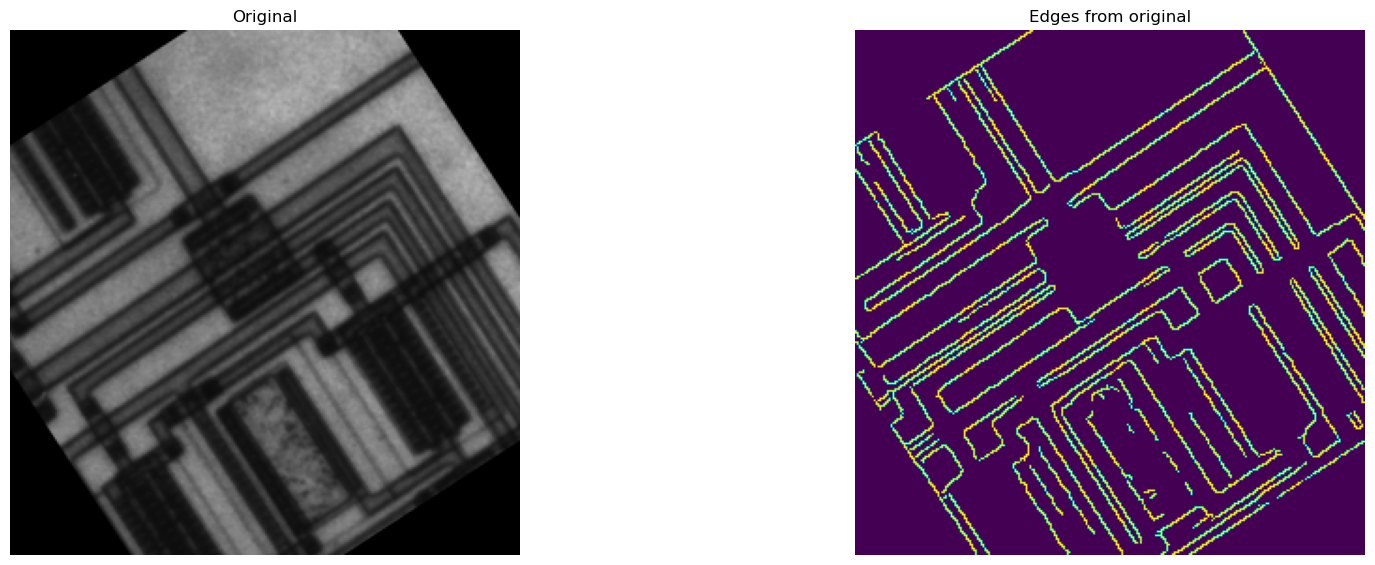

In [ ]:
# Find its edges using the Canny function
circuit_edge = cv2.Canny(rotated_circuit, threshold1 = 105, threshold2 = 185)

plt.figure(figsize = (20,15))
plt.subplot(221); plt.axis('off'); plt.imshow(rotated_circuit);   plt.title('Original')
plt.subplot(222); plt.axis('off'); plt.imshow(circuit_edge);      plt.title('Edges from original')

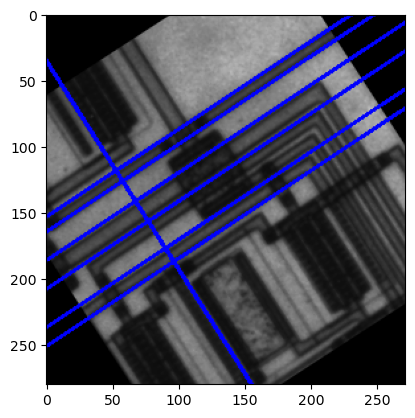

In [ ]:
# Using Hough Transform to find lines in the image.
circuit_lines = cv2.HoughLines(circuit_edge, 2, np.pi/150, 200)

# Draw the lines on the original image
for line in circuit_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(rotated_circuit, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display
plt.imshow(rotated_circuit)

In [ ]:
print(circuit_lines)

[[[137.          0.9843657]]

 [[127.          0.9843657]]

 [[155.          0.9843657]]

 [[209.          0.9843657]]

 [[173.          0.9843657]]

 [[ 19.          2.576106 ]]

 [[197.          0.9843657]]]


In [ ]:
# Save the output
cv2.imwrite('CircuitLine.png', rotated_circuit)

True

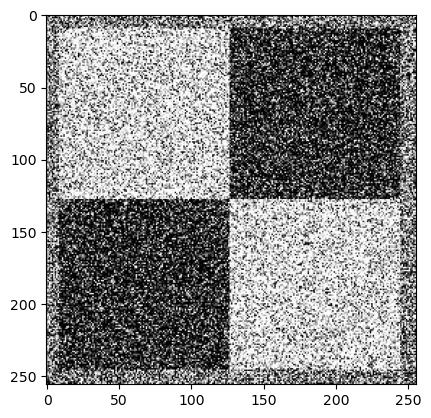

In [ ]:
# Read noisyImage.png file
noisy = cv2.imread("noisyImage.png")
plt.imshow(noisy)

Text(0.5, 1.0, 'Noise Reduced')

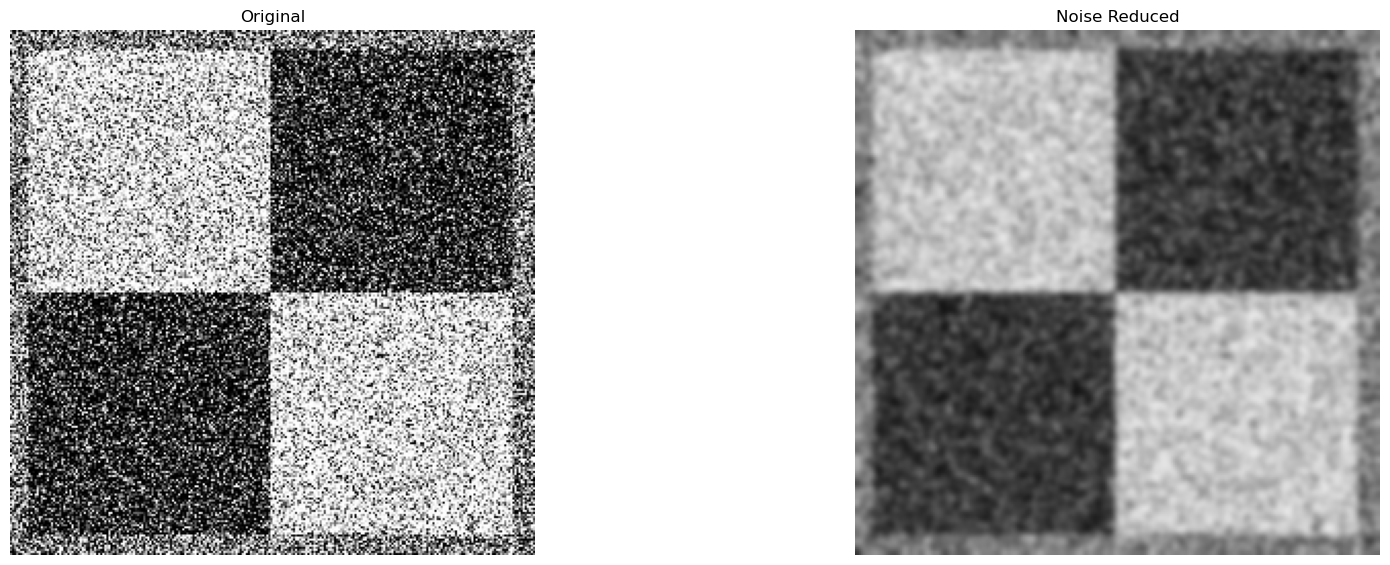

In [ ]:
# Remove noise using a Gaussian filter
less_noisy = cv2.GaussianBlur(noisy, (9, 9), 0)

plt.figure(figsize = (20,15))
plt.subplot(221); plt.axis('off'); plt.imshow(noisy);           plt.title('Original')
plt.subplot(222); plt.axis('off'); plt.imshow(less_noisy);      plt.title('Noise Reduced')

Text(0.5, 1.0, 'Edges from original')

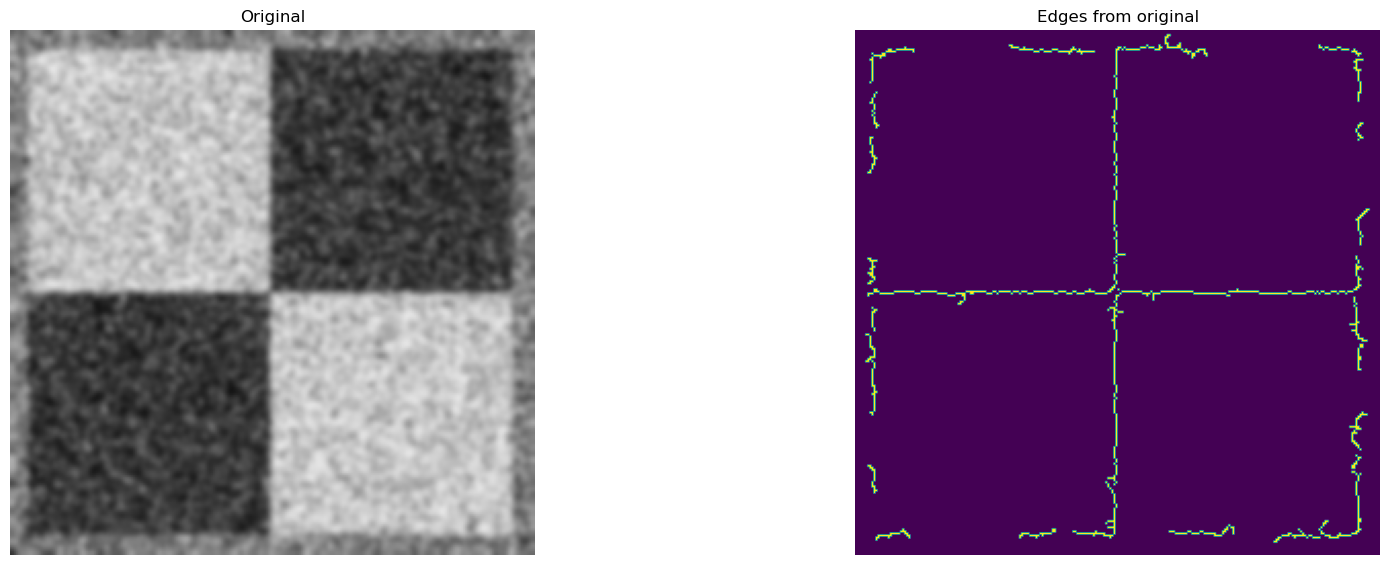

In [ ]:
# Find its edges using the Canny function
noisy_edge = cv2.Canny(less_noisy, threshold1 = 125, threshold2 = 220)

plt.figure(figsize = (20,15))
plt.subplot(221); plt.axis('off'); plt.imshow(less_noisy);   plt.title('Original')
plt.subplot(222); plt.axis('off'); plt.imshow(noisy_edge);      plt.title('Edges from original')

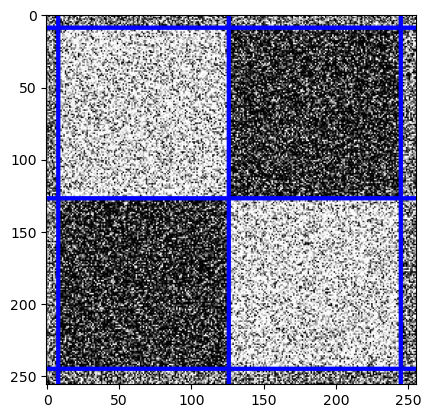

In [ ]:
# Using Hough Transform to find lines in the image.
noisy_lines = cv2.HoughLines(noisy_edge, 1, np.pi/90, 50)

# Draw the lines on the original image
for line in noisy_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(noisy, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display
plt.imshow(noisy)

In [ ]:
print(noisy_lines)

[[[127.          1.5707964]]

 [[126.          0.       ]]

 [[245.          0.       ]]

 [[  8.          0.       ]]

 [[245.          1.5707964]]

 [[  9.          1.5707964]]]


In [ ]:
# Save the output
cv2.imwrite('NoisyLine.png', noisy)

True